In [1]:
import pandas as pd
from stockstats import StockDataFrame
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
!pip install stockstats

In [3]:
import pandas as pd

# Read the data
data = pd.read_csv("data/TSLA.csv")
data = data[["Date","Low","Open","Volume","High","Close"]]
# Ensure the data types are correct, especially the 'date' column if it's not in datetime format
data



,Date,Low,Open,Volume,High,Close
0,2018-01-02,20.733334,20.799999,65283000,21.474001,21.368668
1,2018-01-03,21.036667,21.400000,67822500,21.683332,21.150000
2,2018-01-04,20.378668,20.858000,149194500,21.236668,20.974667
3,2018-01-05,20.799999,21.108000,68868000,21.149332,21.105333
4,2018-01-08,21.033333,21.066668,147891000,22.468000,22.427334
...,...,...,...,...,...,...
1577,2024-04-10,170.009995,173.039993,84532400,174.929993,171.759995
1578,2024-04-11,168.509995,172.550003,94516000,175.880005,174.600006
1579,2024-04-12,170.360001,172.339996,64506600,173.809998,171.050003
1580,2024-04-15,161.380005,170.240005,100245300,170.690002,161.479996


In [4]:
data.isnull().values.any()


False

In [5]:
data.isnull().sum()


Date      0
Low       0
Open      0
Volume    0
High      0
Close     0
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data['Date'])


In [7]:
data

,Date,Low,Open,Volume,High,Close
0,2018-01-02,20.733334,20.799999,65283000,21.474001,21.368668
1,2018-01-03,21.036667,21.400000,67822500,21.683332,21.150000
2,2018-01-04,20.378668,20.858000,149194500,21.236668,20.974667
3,2018-01-05,20.799999,21.108000,68868000,21.149332,21.105333
4,2018-01-08,21.033333,21.066668,147891000,22.468000,22.427334
...,...,...,...,...,...,...
1577,2024-04-10,170.009995,173.039993,84532400,174.929993,171.759995
1578,2024-04-11,168.509995,172.550003,94516000,175.880005,174.600006
1579,2024-04-12,170.360001,172.339996,64506600,173.809998,171.050003
1580,2024-04-15,161.380005,170.240005,100245300,170.690002,161.479996


In [8]:
import pandas as pd

# Assuming 'df' is your DataFrame and the 'Date' column is already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter the DataFrame to include only records after January 1st, 2018
filtered_df = data[data['Date'] > '2017-12-31']
filtered_df

,Date,Low,Open,Volume,High,Close
0,2018-01-02,20.733334,20.799999,65283000,21.474001,21.368668
1,2018-01-03,21.036667,21.400000,67822500,21.683332,21.150000
2,2018-01-04,20.378668,20.858000,149194500,21.236668,20.974667
3,2018-01-05,20.799999,21.108000,68868000,21.149332,21.105333
4,2018-01-08,21.033333,21.066668,147891000,22.468000,22.427334
...,...,...,...,...,...,...
1577,2024-04-10,170.009995,173.039993,84532400,174.929993,171.759995
1578,2024-04-11,168.509995,172.550003,94516000,175.880005,174.600006
1579,2024-04-12,170.360001,172.339996,64506600,173.809998,171.050003
1580,2024-04-15,161.380005,170.240005,100245300,170.690002,161.479996


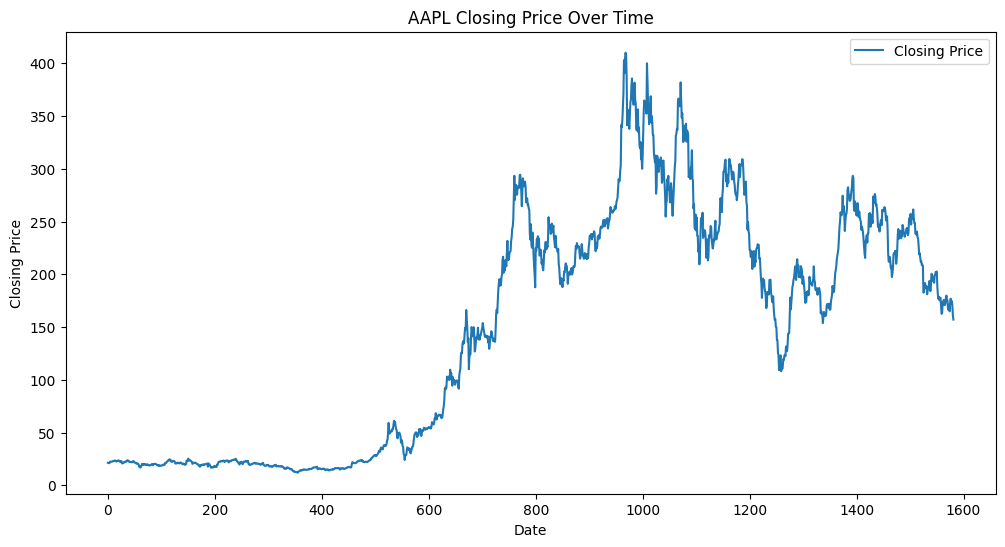

In [9]:
# Set 'Date' as the index of the dataframe for easier plotting
#data.set_index('Date', inplace=True)

# Plotting closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



In [10]:
data

,Date,Low,Open,Volume,High,Close
0,2018-01-02,20.733334,20.799999,65283000,21.474001,21.368668
1,2018-01-03,21.036667,21.400000,67822500,21.683332,21.150000
2,2018-01-04,20.378668,20.858000,149194500,21.236668,20.974667
3,2018-01-05,20.799999,21.108000,68868000,21.149332,21.105333
4,2018-01-08,21.033333,21.066668,147891000,22.468000,22.427334
...,...,...,...,...,...,...
1577,2024-04-10,170.009995,173.039993,84532400,174.929993,171.759995
1578,2024-04-11,168.509995,172.550003,94516000,175.880005,174.600006
1579,2024-04-12,170.360001,172.339996,64506600,173.809998,171.050003
1580,2024-04-15,161.380005,170.240005,100245300,170.690002,161.479996


In [11]:
#data['Date'] = pd.to_datetime(data['Date'])

# Calculate the momentum indicators
data['MOM_5'] = data['Close'] - data['Close'].shift(5)   # 5-day Momentum
data['MOM_10'] = data['Close'] - data['Close'].shift(10) # 10-day Momentum
data['MOM_14'] = data['Close'] - data['Close'].shift(14) # 14-day Momentum

# Stochastic Oscillator Calculations
# %K Line = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100
# %D Line = 3-day Simple Moving Average of %K
lowest_low = data['Low'].rolling(window=14).min()
highest_high = data['High'].rolling(window=14).max()
data['STCK'] = 100 * ((data['Close'] - lowest_low) / (highest_high - lowest_low))
data['STCD'] = data['STCK'].rolling(window=3).mean()


In [12]:
data.head(30)

,Date,Low,Open,Volume,High,Close,MOM_5,MOM_10,MOM_14,STCK,STCD
0,2018-01-02,20.733334,20.799999,65283000,21.474001,21.368668,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,21.036667,21.400000,67822500,21.683332,21.150000,NaN,NaN,NaN,NaN,NaN
2,2018-01-04,20.378668,20.858000,149194500,21.236668,20.974667,NaN,NaN,NaN,NaN,NaN
3,2018-01-05,20.799999,21.108000,68868000,21.149332,21.105333,NaN,NaN,NaN,NaN,NaN
4,2018-01-08,21.033333,21.066668,147891000,22.468000,22.427334,NaN,NaN,NaN,NaN,NaN
5,2018-01-09,21.826668,22.344000,107199000,22.586666,22.246000,0.877332,NaN,NaN,NaN,NaN
6,2018-01-10,22.000000,22.146667,64648500,22.466667,22.320000,1.170000,NaN,NaN,NaN,NaN
7,2018-01-11,22.217333,22.349333,99682500,22.987333,22.530001,1.555334,NaN,NaN,NaN,NaN
8,2018-01-12,22.244667,22.575333,72376500,22.694000,22.414667,1.309334,NaN,NaN,NaN,NaN
9,2018-01-16,22.320000,22.502666,97114500,23.000000,22.670668,0.243334,NaN,NaN,NaN,NaN


In [13]:
raw_data = pd.read_csv("data/TSLA.csv")
tmp_stock = StockDataFrame.retype(raw_data)
data = data[['Date', 'Close', 'MOM_5', 'MOM_10', 'MOM_14', 'STCK', 'STCD']]

days = [5, 10, 14, 30, 50, 100, 200]
for day in days:
    data['close_'+str(day)+'_sma'] = tmp_stock['close_'+str(day)+'_sma'].values
    data['close_'+str(day)+'_ema'] = tmp_stock['close_'+str(day)+'_ema'].values

tmp_stock.MACD_EMA_LONG = 26
tmp_stock.MACD_EMA_SHORT = 13
tmp_stock.MACD_EMA_SIGNAL = 19
data['macd_26_13_19'] = tmp_stock['macd'].values
tmp_stock.MACD_EMA_LONG = 45
tmp_stock.MACD_EMA_SHORT = 25
tmp_stock.MACD_EMA_SIGNAL = 15
data['macd_45_25_15'] = tmp_stock['macd'].values

for day in [14, 28]:
    data['rsi_'+str(day)] = tmp_stock['rsi_'+str(day)].values

for day in [14, 28, 50, 100]:
    data['wr_'+str(day)] = tmp_stock['wr_'+str(day)].values

for day in [14, 50, 100]:
    data['cci_'+str(day)] = tmp_stock['cci_'+str(day)].values

data.to_csv('./data/TSLA_process.csv', sep=',', header=True, index=False)

/var/folders/y5/qp48w1ln6rjgp1z1m108n5t80000gn/T/ipykernel_20754/736805554.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close_'+str(day)+'_sma'] = tmp_stock['close_'+str(day)+'_sma'].values
/var/folders/y5/qp48w1ln6rjgp1z1m108n5t80000gn/T/ipykernel_20754/736805554.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close_'+str(day)+'_ema'] = tmp_stock['close_'+str(day)+'_ema'].values
/var/folders/y5/qp48w1ln6rjgp1z1m108n5t80000gn/T/ipykernel_20754/736805554.py:7: SettingWithCopyWarning: 


In [14]:
data.head(30)

,Date,Close,MOM_5,MOM_10,MOM_14,STCK,STCD,close_5_sma,close_5_ema,close_10_sma,...,macd_45_25_15,rsi_14,rsi_28,wr_14,wr_28,wr_50,wr_100,cci_14,cci_50,cci_100
0,2018-01-02,21.368668,NaN,NaN,NaN,NaN,NaN,21.368668,21.368668,21.368668,...,0.000000,NaN,NaN,-14.221371,-14.221371,-14.221371,-14.221371,NaN,NaN,NaN
1,2018-01-03,21.150000,NaN,NaN,NaN,NaN,NaN,21.259334,21.237467,21.259334,...,-0.004906,0.000000,0.000000,-56.140329,-56.140329,-56.140329,-56.140329,66.666667,66.666667,66.666667
2,2018-01-04,20.974667,NaN,NaN,NaN,NaN,NaN,21.164445,21.112983,21.164445,...,-0.011688,0.000000,0.000000,-54.317817,-54.317817,-54.317817,-54.317817,-100.000000,-100.000000,-100.000000
3,2018-01-05,21.105333,NaN,NaN,NaN,NaN,NaN,21.149667,21.109805,21.149667,...,-0.009769,27.107971,25.973986,-44.302518,-44.302518,-44.302518,-44.302518,-32.272842,-32.272842,-32.272842
4,2018-01-08,22.427334,NaN,NaN,NaN,NaN,NaN,21.405200,21.615586,21.405200,...,0.044085,81.563100,80.128434,-1.946364,-1.946364,-1.946364,-1.946364,161.635945,161.635945,161.635945
5,2018-01-09,22.246000,0.877332,NaN,NaN,NaN,NaN,21.580667,21.845948,21.545334,...,0.067876,73.456796,72.576038,-15.428728,-15.428728,-15.428728,-15.428728,118.137696,118.137696,118.137696
6,2018-01-10,22.320000,1.170000,NaN,NaN,NaN,NaN,21.814667,22.013789,21.656000,...,0.085317,74.567640,73.627972,-12.077275,-12.077275,-12.077275,-12.077275,91.811413,91.811413,91.811413
7,2018-01-11,22.530001,1.555334,NaN,NaN,NaN,NaN,22.125734,22.192846,21.765250,...,0.105627,77.451603,76.303040,-17.531266,-17.531266,-17.531266,-17.531266,103.087945,103.087945,103.087945
8,2018-01-12,22.414667,1.309334,NaN,NaN,NaN,NaN,22.387600,22.268761,21.837408,...,0.112362,72.583481,72.135584,-21.952455,-21.952455,-21.952455,-21.952455,77.185171,77.185171,77.185171
9,2018-01-16,22.670668,0.243334,NaN,NaN,NaN,NaN,22.436267,22.405094,21.920734,...,0.128692,76.164626,75.247493,-12.563536,-12.563536,-12.563536,-12.563536,88.977217,88.977217,88.977217


In [15]:
data.fillna(0, inplace=True)
data

,Date,Close,MOM_5,MOM_10,MOM_14,STCK,STCD,close_5_sma,close_5_ema,close_10_sma,...,macd_45_25_15,rsi_14,rsi_28,wr_14,wr_28,wr_50,wr_100,cci_14,cci_50,cci_100
0,2018-01-02,21.368668,0.000000,0.000000,0.000000,0.000000,0.000000,21.368668,21.368668,21.368668,...,0.000000,0.000000,0.000000,-14.221371,-14.221371,-14.221371,-14.221371,0.000000,0.000000,0.000000
1,2018-01-03,21.150000,0.000000,0.000000,0.000000,0.000000,0.000000,21.259334,21.237467,21.259334,...,-0.004906,0.000000,0.000000,-56.140329,-56.140329,-56.140329,-56.140329,66.666667,66.666667,66.666667
2,2018-01-04,20.974667,0.000000,0.000000,0.000000,0.000000,0.000000,21.164445,21.112983,21.164445,...,-0.011688,0.000000,0.000000,-54.317817,-54.317817,-54.317817,-54.317817,-100.000000,-100.000000,-100.000000
3,2018-01-05,21.105333,0.000000,0.000000,0.000000,0.000000,0.000000,21.149667,21.109805,21.149667,...,-0.009769,27.107971,25.973986,-44.302518,-44.302518,-44.302518,-44.302518,-32.272842,-32.272842,-32.272842
4,2018-01-08,22.427334,0.000000,0.000000,0.000000,0.000000,0.000000,21.405200,21.615586,21.405200,...,0.044085,81.563100,80.128434,-1.946364,-1.946364,-1.946364,-1.946364,161.635945,161.635945,161.635945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,2024-04-10,171.759995,3.379990,-5.910003,-3.900009,47.388364,56.290371,171.525998,172.288693,172.348000,...,-3.535005,45.856141,43.548113,-52.611636,-74.437633,-75.049906,-89.246799,-6.560040,-69.304516,-88.062685
1578,2024-04-11,174.600006,3.490005,-5.229996,1.779999,59.351340,58.565027,172.223999,173.059131,171.825000,...,-3.107128,48.477531,44.907334,-40.648660,-64.092739,-68.751369,-86.532203,9.834233,-61.828807,-84.642709
1579,2024-04-12,171.050003,6.150009,-4.739990,0.220001,44.397665,50.379123,173.454001,172.389421,171.351001,...,-3.019679,45.511363,43.548132,-55.602335,-56.229204,-76.624517,-89.925438,-18.526388,-68.014469,-86.079047
1580,2024-04-15,161.479996,-11.500000,-13.740005,-11.150009,4.085934,35.944980,171.154001,168.752946,169.977001,...,-3.680172,38.646476,40.150793,-95.914066,-95.914066,-97.848745,-99.072834,-133.862469,-112.860782,-101.627330


In [16]:
data.to_csv('./data/TSLA_process.csv', sep=',', header=True, index=False)